In [10]:
import scipy.io as sio
import numpy as np
# download the training data form 

# the array dzip contain the numbers with length 1707
dzip = sio.loadmat('dzip.mat')['dzip'][0]
#the array azip contain the 1707 images for the numbers in dzip array
azip = sio.loadmat('azip.mat')['azip']

In [11]:
# in the function, we will count how many times the digit apper in dzip
def count_numbers_copies(dzip):
    # digits_copies_counter hold the number of copies
    digits_copies_counter =[]
    # hold the indexes of each digit in dzip
    indexes = []
    for digit in range (10):
        indexes.append ([])
        counter = 0
        for index, i in enumerate (dzip):
            if i == digit:
                counter +=1
                indexes[digit].append(index)
        digits_copies_counter.append(counter)
    return digits_copies_counter,indexes
digits_copies ,indexes =  count_numbers_copies(dzip)
for digit,copies in enumerate(digits_copies):
    print ("the count of copies of digit ",digit , " is ",copies ," copies ." )
#for index,i in enumerate (indexes):
#    print ("------------------------------------------")
#    for j in i :
#        print ("index = ", index ," j = ", j ," dzip value is ",dzip[j] )

the count of copies of digit  0  is  319  copies .
the count of copies of digit  1  is  252  copies .
the count of copies of digit  2  is  202  copies .
the count of copies of digit  3  is  131  copies .
the count of copies of digit  4  is  122  copies .
the count of copies of digit  5  is  88  copies .
the count of copies of digit  6  is  151  copies .
the count of copies of digit  7  is  166  copies .
the count of copies of digit  8  is  144  copies .
the count of copies of digit  9  is  132  copies .


In [12]:
# create numpy zreos matrices for each digit in array of size 10 
def numpy_zreos_matrices(digits_copies):
    array_of_matrices = []
    for copies in digits_copies:
        # create matrix for each digit depend on the number of copies and 256 which is 16 * 16 pixels
        M = np.zeros(shape=(256,copies))
        array_of_matrices.append(M)
    
    return array_of_matrices
digits_matrices = numpy_zreos_matrices(digits_copies)


In [13]:
# now we fill our digits_matrices with inforamtion imges from azip
def preparation_function(dzip,azip,digits_matrices):
    for i in range (10):
        counter =0
        for index , item  in enumerate(dzip):
            if item == i:
                digits_matrices[i][:,counter] = azip[:,index]
                counter += 1
    return digits_matrices
digits_matrices = preparation_function(dzip,azip,digits_matrices)

In [14]:
# find the distance between the image and the matrix of the digit
def find_the_distance(M,k,var,azip ):
    U0 , S ,VT = np.linalg.svd(M)
    # k = 3
    # var = 53
    smallU0 = U0[:,0:k]
    d =azip[:,var]# test[var]
    I = np.eye(256)
    v =np.matmul ((I - np.matmul (smallU0 , smallU0.T)) , d)
    distance = np.linalg.norm(v)  
    return distance 

In [97]:
# here we import time for performance measurement
import time

# training the model and find best k
def find_All_k(digits_matrices,azip,var,Ks):
    distances=[]
    Periods = []
    Ks = Ks +1 # because we will have less Ks by one since we start k for loop by 1 
    for k in range (1,Ks):
        distances.append([])# this list for number form 0 to 9
        Periods.append([])
        for M in digits_matrices:
            start = time.time()
            distance  = find_the_distance(M,k,var,azip)
            end = time.time()
            period = end - start
            Periods[k-1].append(period)
            distances[k-1].append(distance)
    return distances,Periods

def prediction(distances):
    predict_List=[]
    for row in distances:
        x = min(v for v in row) # here we take the smallest distance 
        index = row.index(x)    # we will take the index of that smallest distance
                                # because it represents the digit
        predict_List.append(index)
        
    return predict_List         # the index of predict_List will represent the k value

Ks=200 # we will use 20 Ks
var = 345# which is index of digit 2  345
    
distances ,Periods= find_All_k(digits_matrices,azip,var,Ks)  
predict_List  = prediction(distances)
Periods_List  = []
# here sum all Periods for a k  
for i in Periods:
    Periods_List.append(sum(i))
    
for i in range (Ks):
    print ("k =",i+1,"  predict=",predict_List[i],"  ",
           predict_List[i] == dzip[var] ,"  Period =",Periods_List[i])
print ("the corect value is = ",dzip[var])



k = 1   predict= 0    False   Period = 0.12653684616088867
k = 2   predict= 0    False   Period = 0.08533644676208496
k = 3   predict= 0    False   Period = 0.0853891372680664
k = 4   predict= 0    False   Period = 0.08583784103393555
k = 5   predict= 0    False   Period = 0.08553886413574219
k = 6   predict= 2    True   Period = 0.08837080001831055
k = 7   predict= 2    True   Period = 0.10482263565063477
k = 8   predict= 2    True   Period = 0.09830164909362793
k = 9   predict= 2    True   Period = 0.09956121444702148
k = 10   predict= 2    True   Period = 0.09841203689575195
k = 11   predict= 2    True   Period = 0.10124373435974121
k = 12   predict= 2    True   Period = 0.09077167510986328
k = 13   predict= 2    True   Period = 0.10601496696472168
k = 14   predict= 2    True   Period = 0.09756851196289062
k = 15   predict= 2    True   Period = 0.09711885452270508
k = 16   predict= 2    True   Period = 0.09290838241577148
k = 17   predict= 2    True   Period = 0.3786122798919678
k =

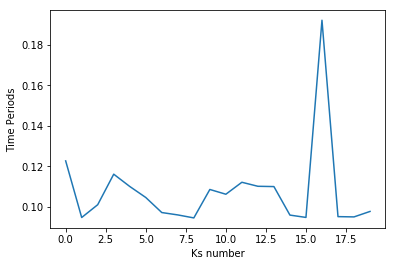

In [95]:
import matplotlib.pyplot as plt
plt.plot(Periods_List)
plt.ylabel('Time Periods')
plt.xlabel('Ks number')
plt.show()

In [100]:
Ks=20 # we will use 20 Ks

Best_k_list=[0]* Ks # List of zeros to find the best k
for var in range(len (dzip)):# which is 1707 all the data set samples
    print (var)
    distances ,Periods= find_All_k(digits_matrices,azip,var,Ks)
    # I need to add all Periods togther in the same k to give some maening  
    predict_List  = prediction(distances)
    Periods_List  = []
    for i in Periods:
        Periods_List.append(sum(i))
    for i in range (Ks):
        if predict_List[i] == dzip[var]:
            # if true increase the best k for these loop by one
            Best_k_list[i] +=1
            # here in this loop try to find smallest correct k then break
            break
print (Best_k_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [102]:

f = open ("Best_k_list.txt","w+")
f.write(str(Best_k_list))
f.close()

In [103]:
f = open ("Best_k_list.txt","r")
Best_k_listr = f.read()
print (Best_k_listr)
f.close()

[1464, 131, 45, 23, 9, 10, 7, 2, 1, 2, 1, 3, 1, 1, 0, 2, 2, 0, 1, 0]


In [104]:
print ("so the best k for this data set is 6 ")

so the best k for this data set is 6 


In [16]:
l = [6,2,7,3,10]
x = min(v for v in l)
print (x)
print (l.index(x))

2
1


In [17]:
counter =0
for i in dzip:
    if i == 0:
        counter +=1
print(counter)

319


In [18]:
M0 = np.zeros(shape=(256,319))

In [19]:
counter =0
for index , item  in enumerate(dzip):
    if item == 0:
        M0[:,counter] = azip[:,index]
        counter += 1
        
M0[:,318]    

array([-1.   , -1.   , -1.   , -0.567, -0.064,  0.979, -0.009, -0.167,
       -0.999, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   ,  0.405,  1.   ,  1.   ,  1.   ,  1.   ,
        0.482, -0.701, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.242,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  0.809,  0.351, -0.764, -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.091,  1.   ,  1.   ,  1.   ,  1.   ,
        0.848,  1.   ,  1.   ,  0.748, -0.536, -1.   , -1.   , -1.   ,
       -1.   , -0.987, -0.71 ,  0.861,  1.   ,  1.   ,  1.   ,  1.   ,
       -0.105,  0.963,  1.   ,  1.   ,  0.625, -0.662, -1.   , -1.   ,
       -1.   , -0.476,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
       -0.282, -0.457,  1.   ,  1.   ,  1.   ,  0.481, -0.768, -1.   ,
       -1.   , -0.249,  1.   ,  1.   ,  1.   ,  0.859, -0.046, -0.862,
       -0.962, -0.991, -0.255,  1.   ,  1.   ,  1.   ,  0.046, -1.   ,
      

In [20]:
U0 , S ,VT = np.linalg.svd(M0)
k = 3
var = 53
smallU0 = U0[:,0:k]
d =azip[:,var]
I = np.eye(256)
v =np.matmul ((I - np.matmul (smallU0 , smallU0.T)) , d)
resut= np.linalg.norm(v)  
print (resut)
print (dzip[var])
print(U0[:,2])

10.25727020263881
0
[ 3.98898653e-03  3.93747880e-03  4.29368147e-03  3.86999254e-03
  8.56248566e-03  1.03812827e-02 -1.01912006e-02 -3.06888830e-02
 -2.70207522e-02 -5.48713791e-03 -7.56610184e-04  2.12160451e-04
  4.42569358e-03  4.00671009e-03  3.98898653e-03  3.98898653e-03
  3.98898653e-03  4.28826794e-03  4.72702873e-03  1.17171161e-02
  1.77439207e-02  5.06190173e-03 -1.41184654e-02 -1.71698462e-02
 -1.94162868e-02 -1.51246680e-02 -4.74484596e-03 -5.33311387e-03
  2.62552388e-03  4.16433167e-03  4.08897692e-03  3.98898653e-03
  3.98898653e-03  2.48074131e-03  3.38434471e-03  1.74358853e-02
  2.31434208e-02  1.79313699e-02  2.56327210e-02  5.16272155e-02
  6.40864279e-02  5.58893757e-02  2.73803400e-02  1.28920106e-02
  3.84598903e-03 -4.89202476e-04  3.67924663e-03  4.12501481e-03
  3.98025127e-03 -7.45786487e-04  1.38388420e-02  3.76997102e-02
  3.96825597e-02  4.32941341e-02  9.28082897e-02  1.35648474e-01
  1.33383163e-01  1.16910208e-01  8.97427968e-02  5.36571341e-02
  2.1

In [21]:
A = np.matmul (smallU0 , smallU0.T)
A.shape
print(A[0:5,0:5])

[[0.00918939 0.00917096 0.00910001 0.00874913 0.00779948]
 [0.00917096 0.0091526  0.0090819  0.00873128 0.00778221]
 [0.00910001 0.0090819  0.00901277 0.00866178 0.00771492]
 [0.00874913 0.00873128 0.00866178 0.00833444 0.00744676]
 [0.00779948 0.00778221 0.00771492 0.00744676 0.00674142]]


In [22]:
print(d[0:10])

[-1.    -1.    -1.    -1.    -1.    -1.    -0.32   0.731 -0.657 -1.   ]


In [23]:
v = np.matmul ((I - np.matmul (smallU0 , smallU0.T)) , d)
print(v[0:10])

[-0.39085207 -0.39327904 -0.40255033 -0.40514675 -0.39126455 -0.53380574
 -0.34085922  0.31375471 -0.94755834 -0.78422684]


In [24]:
v.shape
print(v[0:10])

[-0.39085207 -0.39327904 -0.40255033 -0.40514675 -0.39126455 -0.53380574
 -0.34085922  0.31375471 -0.94755834 -0.78422684]


In [25]:
for index , item  in enumerate(dzip):
    if item == 0:
        print (index)

8
11
18
49
53
58
63
65
68
72
80
95
97
101
102
104
106
108
111
116
122
130
132
134
139
157
169
176
180
185
189
192
207
218
222
225
229
235
248
254
266
270
271
272
278
279
280
283
288
294
295
304
317
321
328
332
333
334
335
355
363
365
370
372
375
388
390
400
402
405
409
411
414
419
433
435
438
443
449
451
453
458
461
471
479
481
486
489
493
498
500
513
515
520
521
528
538
541
543
548
579
580
590
595
600
637
641
649
651
654
655
657
658
662
663
667
670
672
677
682
684
687
688
690
693
708
711
716
724
731
732
733
736
737
741
742
748
754
758
759
764
767
769
774
778
779
782
784
789
793
794
799
804
807
809
813
816
820
823
824
827
829
830
833
834
835
837
839
840
845
848
849
851
853
856
857
864
865
867
869
870
874
875
878
879
882
883
885
887
888
892
893
897
898
902
915
916
919
921
923
928
930
938
940
944
955
965
967
969
979
992
993
998
1002
1003
1006
1010
1016
1028
1031
1034
1037
1038
1043
1064
1065
1070
1079
1099
1124
1125
1126
1149
1150
1153
1154
1158
1159
1163
1165
1168
1169
1172
1177
1179
11

In [26]:
dzip[8]

0

In [27]:
d = 

SyntaxError: invalid syntax (<ipython-input-27-6f2c14ea74e1>, line 1)